<style>
    body {
        background-color: #000000;
        color: #FFFFFF;
        font-family: Arial, sans-serif;
    }

    h1 {
        color: #FFD700;
        text-decoration: underline;
    }

    h2 {
        color: #FFD700;
    }

    ul {
        color: #FFFFFF;
    }

    li {
        color: #808080;
    }
</style>

<h1>Projet 9: Produisez une étude de marché avec Python " La Poule Qui Chante" </h1>

<h2>Part I )  Data Cleaning</h2>

<ul>
    <li>Étape 1 - Importation et nettoyage des données</li>
    <li>Étape 2 - Traitement des données manquantes</li>
    <li>Étape 3 - Suppression des doublons</li>
    <li>Étape 4 - Normalisation des données</li>
</ul>


<style>
    body {
        background-color: #FDF5E5;
        color: #000000;
        font-family: Arial, sans-serif;
    }

    h1 {
        color: #FDF5E5;
        background-color: none;
        padding: 10px;
        text-decoration: underline;
    }

    h2 {
        color: #FDF5E5;
        background-color: none;
        padding: 5px;
    }

    p {
        color: #FDF5E5;
    }

    ul {
        color: #FDF5E5;
        list-style-type: disc;
        margin-left: 20px;
    }

    li {
        color: #FDF5E5;
    }
</style>

<h1>Contexte du projet de data analyse :</h1>
<ul>
    <li>L'objectif de cette mission est d'identifier les groupements de pays vers lesquels vous pouvez exporter vos poulets. Je vais utiliser les données de la FAO pour effectuer une analyse approfondie du marché.</li>
</ul>

<h2>Démarche :</h2>
<ul>
    <li>Préparation et nettoyage des données : Je vais commencer par charger les données de la FAO et effectuer les étapes de préparation nécessaires, telles que le nettoyage des données manquantes, la transformation des variables, etc.</li>
    <li>Analyse exploratoire des données : Je vais explorer les données pour comprendre les caractéristiques clés et les tendances du marché mondial du poulet. Cela peut inclure des visualisations telles que des graphiques de répartition, des corrélations entre les variables, etc.</li>
    <li>Classification ascendante hiérarchique (CAH) : J'utiliserai la méthode de la CAH pour regrouper les pays similaires en fonction de certaines variables clés. Je construirai un dendrogramme pour visualiser les regroupements et les distances entre les pays.</li>
    <li>K-means : Ensuite, j'appliquerai la méthode des k-means pour affiner l'analyse. Cela permettra de former des clusters plus précis en se basant sur des critères spécifiques. Je comparerai les résultats de la CAH et des k-means pour évaluer les similitudes et les différences entre les deux approches de clustering.</li>
    <li>Analyse en composantes principales (ACP) : J'utiliserai l'ACP pour réduire la dimensionnalité des données et visualiser les résultats de l'analyse. Cela aidera à comprendre les groupes formés, les relations entre les variables et les relations entre les pays.</li>
</ul>

<h1>Résultats et recommandations :</h1>
<ul>
    <li>Je présenterai les résultats de l'analyse, notamment les groupements identifiés à partir des différentes méthodes de clustering. Je fournirai des recommandations basées sur ces résultats, en identifiant les groupements de pays les plus pertinents pour exporter vos poulets. J'expliquerai également les liens entre les variables et les pays, ce qui pourrait fournir des informations supplémentaires pour prendre des décisions stratégiques.</li>
    <li>Je préparerai un notebook  pour chaque étape de l'analyse, en incluant les codes, les visualisations et les explications nécessaires.


<div style="font-family: monospace;">
    <pre>
                     __  _
                  .-.'  `; `-._  __  _
                 (_,         .-:'  `; `-._
               ,'o"(        (_,           )
              (__,-'      ,'o"(            )>
                 (       (__,-'            )
                  `-'._.--._(             )
                     ||||  ||||`-'._.--._.-'
                               ||||  ||||
    </pre>
</div>


# Partie 1) Importation et nettoyage des données 


### Importation des bibliothèques nécessaires :


In [250]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Lecture du fichier "Population_2000_2018.csv" et affichage des premières lignes pour vérification.


In [251]:
#Importation des données 'Population'
population = pd.read_csv("/Users/rawmancerecord/Desktop/DATA ANALYST⚚/Projet 9 OCR/Projet 9 FINAL/Population_2000_2018.csv", sep=',', encoding='utf-8')
population.head()


,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [252]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

### Analyse des données de population pour comprendre la structure et les statistiques des variables.



L'analyse des données montre que la dataframe fournie comprend des informations sur différents domaines, zones géographiques, éléments, produits, années et unités. Les colonnes Code Domaine, Domaine, Code zone, Zone, Code Élément, Élément, Code Produit, Produit, Code année, Année, Unité, Valeur, Symbole, Description du Symbole et Note sont présentes dans la dataframe.

Les variables Code Domaine, Domaine, Zone, Élément, Produit, Unité, Symbole et Description du Symbole sont des variables catégorielles, tandis que les variables Code zone, Code Élément, Code Produit, Code année, Année et Valeur sont des variables numériques.

En examinant les statistiques des variables numériques, nous constatons que certaines variables ont des écarts types de zéro, ce qui indique qu'elles ont la même valeur pour toutes les observations. Cela pourrait être dû à une codification ou une classification particulière de ces variables.

De plus, nous observons des valeurs minimales et maximales pour chaque variable numérique, ce qui permet de déterminer les plages de ces valeurs. Les quartiles nous donnent des informations sur la distribution des valeurs et nous aident à comprendre la répartition des observations autour de la médiane.

La présence d'une colonne "Note" avec seulement 258 valeurs non nulles suggère qu'il existe des informations supplémentaires ou des commentaires spécifiques pour un sous-ensemble des données.


In [253]:
# Sélection des années 2012 et 2017
annees_selectionnees = [2012, 2017]
dynamique_Demo = population[population['Année'].isin(annees_selectionnees)]

# Pivot des données en utilisant la colonne 'Zone' comme index
dynamique_Demo = dynamique_Demo.pivot(index='Zone', columns='Année', values='Valeur')

# Calcul du total de population pour chaque année
total_2012 = dynamique_Demo[2012].sum()
total_2017 = dynamique_Demo[2017].sum()

# Calcul de la variation en population entre 2012 et 2017
variation = (total_2017 - total_2012) / total_2017

# Calcul des fluctuations par pays
dynamique_Demo['Fluctuation'] = (dynamique_Demo[2017] - dynamique_Demo[2012]) / dynamique_Demo[2012]

# Affichage de l'évolution globale de la population
print("Évolution globale de la population entre 2012 et 2017: {:.2%}".format(variation))

# Affichage du tableau avec les fluctuations par pays
print(dynamique_Demo)

Évolution globale de la population entre 2012 et 2017: 5.59%
Année                           2012       2017  Fluctuation
Zone                                                        
Afghanistan                31161.376  36296.113     0.164779
Afrique du Sud             52832.658  57009.756     0.079063
Albanie                     2914.096   2884.169    -0.010270
Algérie                    37383.895  41389.189     0.107140
Allemagne                  80972.628  82658.409     0.020819
...                              ...        ...          ...
Îles Salomon                 556.063    636.039     0.143825
Îles Turques-et-Caïques       34.066     37.115     0.089503
Îles Vierges américaines     105.534    104.751    -0.007419
Îles Vierges britanniques     28.650     29.577     0.032356
Îles Wallis-et-Futuna         12.375     11.900    -0.038384

[236 rows x 3 columns]


L'analyse des données montre l'évolution globale de la population entre 2012 et 2017 pour différentes zones géographiques. La variation est exprimée en pourcentage.

Sur la période de 2012 à 2017, la population mondiale a connu une augmentation moyenne de 5.59%.

En examinant les données spécifiques pour chaque zone, nous observons des fluctuations différentes. Par exemple, l'Afghanistan a connu une augmentation de sa population de 16.48%, l'Afrique du Sud a enregistré une augmentation de 7.91%, tandis que l'Albanie a connu une légère diminution de 1.03% de sa population.

D'autres pays comme l'Algérie ont connu une augmentation de 10.71%, l'Allemagne a enregistré une légère augmentation de 2.08%, et ainsi de suite pour les autres zones géographiques.

Ces chiffres fournissent un aperçu des variations de population entre 2012 et 2017 à travers différentes régions du monde.



In [254]:
population.describe()

,Code zone,Code Élément,Code Produit,Code année,Année,Valeur
count,4411.000000,4411.0,4411.0,4411.000000,4411.000000,4.411000e+03
mean,132.202902,511.0,3010.0,2009.068238,2009.068238,2.963004e+04
std,75.854840,0.0,0.0,5.481539,5.481539,1.238029e+05
min,1.000000,511.0,3010.0,2000.000000,2000.000000,7.850000e-01
25%,68.000000,511.0,3010.0,2004.000000,2004.000000,3.921890e+02
50%,132.000000,511.0,3010.0,2009.000000,2009.000000,4.764741e+03
75%,195.000000,511.0,3010.0,2014.000000,2014.000000,1.821548e+04
max,299.000000,511.0,3010.0,2018.000000,2018.000000,1.427648e+06



L'analyse des données fournit des informations sur plusieurs variables numériques, telles que Code zone, Code Élément, Code Produit, Code année, Année et Valeur. Nous allons nous concentrer principalement sur la variable "Valeur", car elle semble représenter une mesure numérique pertinente dans le contexte de l'analyse.

Voici un résumé des principales statistiques des variables numériques :

Count : Le nombre d'observations pour chaque variable est de 4411.
Mean : La moyenne de la variable "Valeur" est de 29630.04. Cela donne une idée de la valeur moyenne observée.
Std : L'écart type de la variable "Valeur" est de 123802.9. Cela mesure la dispersion des valeurs autour de la moyenne et indique la variabilité des données.
Min : La valeur minimale de la variable "Valeur" est de 0.785. C'est la plus petite valeur observée.
25% : Le premier quartile de la variable "Valeur" est de 392.189. Cela signifie que 25% des observations ont une valeur inférieure ou égale à ce seuil.
50% : Le deuxième quartile (médiane) de la variable "Valeur" est de 4764.741. Cela divise les observations en deux parties égales, avec 50% des valeurs inférieures et 50% des valeurs supérieures à ce seuil.
75% : Le troisième quartile de la variable "Valeur" est de 18215.48. Cela indique que 75% des observations ont une valeur inférieure ou égale à ce seuil.
Max : La valeur maximale de la variable "Valeur" est de 1427648. C'est la plus grande valeur observée.
Il est important de noter que les variables "Code zone", "Code Élément" et "Code Produit" semblent être des catégories ou des identifiants, plutôt que des variables numériques. Elles peuvent être utilisées pour regrouper ou classifier les données, mais elles ne sont pas incluses dans les calculs statistiques tels que la moyenne, l'écart type ou les quartiles.

En résumé, l'analyse des données indique la distribution et la variation des valeurs numériques dans la variable "Valeur", tandis que les autres variables semblent être des identifiants ou des catégories utilisées pour classifier les données.

## Identification d'une valeur minimale suspecte dans la colonne "Valeur" et suppression de la ligne correspondante.


In [255]:
#identification  valeur minimale suspecte
min_value_row = population.loc[population['Valeur'] == 0.785]
print(min_value_row)

     Code Domaine                       Domaine  Code zone         Zone  \
3655           OA  Séries temporelles annuelles         94  Saint-Siège   

      Code Élément            Élément  Code Produit                 Produit  \
3655           511  Population totale          3010  Population-Estimations   

      Code année  Année           Unité  Valeur Symbole  \
3655        2000   2000  1000 personnes   0.785       X   

             Description du Symbole  \
3655  Sources internationales sûres   

                                                   Note  
3655  UNDESA, Population Division – World Population...  



Le code ci-dessus identifie une valeur minimale suspecte dans la colonne "Valeur" du dataframe "population" et renvoie la ligne correspondante. Dans ce cas, la valeur minimale est de 0.785. Voici la ligne qui contient cette valeur :

Code Domaine : OA
Domaine : Séries temporelles annuelles
Code zone : 94
Zone : Saint-Siège
Code Élément : 511
Élément : Population totale
Code Produit : 3010
Produit : Population-Estimations
Code année : 2000
Année : 2000
Unité : 1000 personnes
Valeur : 0.785
Symbole : X
Description du Symbole : Sources internationales sûres
Note : UNDESA, Population Division – World Population Prospects

Cette ligne correspond aux données de la population estimée pour le Saint-Siège (Vatican) en l'an 2000, avec une valeur de 0.785. Il est possible que cette valeur soit une anomalie ou une donnée erronée, car elle est nettement inférieure aux autres valeurs observées dans le dataframe.

In [256]:
population = population.drop(population[population['Valeur'] == 0.785].index)


In [257]:
# Vérification des doublons dans la colonne "Zone" de la dataframe "population" et suppression des doublons.
population.duplicated(['Zone']).sum()


4172

## Pivotement des données pour obtenir la dynamique démographique par zone.


In [258]:
# Sélection des années 2012 et 2017 pour l'analyse de la dynamique démographique.
dynamique_Demo = population[population['Année'].isin([2012, 2017])][['Zone', 'Valeur', 'Année']].drop_duplicates()
dynamique_Demo = dynamique_Demo.pivot_table(values='Valeur', index='Zone', columns='Année')
dynamique_Demo['Variation'] = (dynamique_Demo[2017] - dynamique_Demo[2012]) / dynamique_Demo[2017]
dynamique_Demo = dynamique_Demo.reset_index()

#Calcul de la variation en population entre 2012 et 2017.
#Calcul des fluctuations de population pour chaque zone.

In [259]:
dynamique_Demo.duplicated(['Zone']).sum()


0

In [260]:
demographie = pd.merge(population, dynamique_Demo[['Zone', 'Variation']], on='Zone', how='inner')


In [261]:
demographie.duplicated(['Zone']).sum()

4156

In [262]:
# Changer l'unité de la valeur
demographie['Population'] = demographie['Valeur']*1000

In [263]:
# Changer la type des données
demographie = demographie.astype({'Population':int})

In [264]:
demographie.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note,Variation,Population
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN,0.141468,20779953
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN,0.141468,21606988
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN,0.141468,22600770
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN,0.141468,23680871
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN,0.141468,24726684


In [265]:
# Sélection des colonnes utiles
demographie = demographie[['Zone', 'Année', 'Population','Variation']]
demographie['Variation'] = demographie['Variation']*100
demographie.head(100)

,Zone,Année,Population,Variation
0,Afghanistan,2000,20779953,14.146796
1,Afghanistan,2001,21606988,14.146796
2,Afghanistan,2002,22600770,14.146796
3,Afghanistan,2003,23680871,14.146796
4,Afghanistan,2004,24726684,14.146796
...,...,...,...,...
95,Andorre,2000,65390,-7.046662
96,Andorre,2001,67341,-7.046662
97,Andorre,2002,70049,-7.046662
98,Andorre,2003,73182,-7.046662


La population de l'Afghanistan a augmenté de manière constante au cours de la période étudiée, avec une variation annuelle moyenne d'environ 14,15%.
Les chiffres de population de l'Andorre montrent une variation négative, ce qui signifie que la population a diminué au fil des ans. La variation annuelle moyenne est d'environ -7,05%.


In [266]:
#Afficher les intitulés uniques de la colonne 'Zone'
demographie.Zone.unique()


array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Andorre', 'Angola', 'Anguilla', 'Antigua-et-Barbuda',
       'Antilles néerlandaises (ex)', 'Arabie saoudite', 'Argentine',
       'Arménie', 'Aruba', 'Australie', 'Autriche', 'Azerbaïdjan',
       'Bahamas', 'Bahreïn', 'Bangladesh', 'Barbade', 'Bélarus',
       'Belgique', 'Belize', 'Bénin', 'Bermudes', 'Bhoutan',
       'Bolivie (État plurinational de)',
       'Bonaire, Saint-Eustache et Saba', 'Bosnie-Herzégovine',
       'Botswana', 'Brésil', 'Brunéi Darussalam', 'Bulgarie',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodge', 'Cameroun',
       'Canada', 'Chili', 'Chine - RAS de Hong-Kong',
       'Chine - RAS de Macao', 'Chine, continentale',
       'Chine, Taiwan Province de', 'Chypre', 'Colombie', 'Comores',
       'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatie', 'Cuba',
       'Curaçao', 'Danemark', 'Djibouti', 'Dominique', 'Égypte',
       'El Salvador', 'Émirats arabes unis', 'Équate

In [267]:
demographie['Zone'].nunique()

236

In [268]:
demographie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4392 entries, 0 to 4391
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Zone        4392 non-null   object 
 1   Année       4392 non-null   int64  
 2   Population  4392 non-null   int64  
 3   Variation   4392 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 137.4+ KB


In [269]:
# Nombre de valeurs manquantes
demographie.isnull().sum()

Zone          0
Année         0
Population    0
Variation     0
dtype: int64

# Filtrage des données pour l'année 2017.

In [270]:
# Filtrage des données de la démographie pour l'année 2017
demographie_2017 = demographie[demographie['Année'] == 2017]

In [271]:
# Check duplicats Demographie_2017
demographie_2017.duplicated(['Zone']).sum()

0

## 2) Importation des données de disponibilité alimentaire.

In [272]:
#Importation des données 'DisponibiliteAlimentaire_2017'
dispo_alimentaire = pd.read_csv("/Users/rawmancerecord/Desktop/DATA ANALYST⚚/Projet 9 OCR/Projet 9 FINAL/DisponibiliteAlimentaire_2017.csv", sep=',', encoding='utf-8')
dispo_alimentaire.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [273]:
dispo_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

In [274]:
dispo_alimentaire.describe()

,Code zone,Code Élément,Code Produit,Code année,Année,Valeur
count,176600.000000,176600.000000,176600.000000,176600.0,176600.0,176600.000000
mean,125.474740,3810.052894,2628.778545,2017.0,2017.0,210.554918
std,72.941699,2211.790089,91.993247,0.0,0.0,4762.047787
min,1.000000,645.000000,2511.000000,2017.0,2017.0,-10388.000000
25%,63.000000,684.000000,2556.000000,2017.0,2017.0,0.000000
50%,120.000000,5142.000000,2612.000000,2017.0,2017.0,0.120000
75%,188.000000,5301.000000,2732.000000,2017.0,2017.0,8.462500
max,276.000000,5911.000000,2899.000000,2017.0,2017.0,758548.000000


## Analyse des données de disponibilité alimentaire pour comprendre la structure et les statistiques des variables.


La présence d'une valeur minimale négative (-10 388) indique qu'il y a des observations avec des valeurs négatives dans le jeu de données. Cela pourrait nécessiter une investigation plus approfondie pour comprendre pourquoi ces valeurs sont négatives et s'il s'agit d'une erreur ou d'un phénomène réel.
Grande variation : L'écart type élevé (4 762,05) révèle une grande dispersion des valeurs autour de la moyenne. Cela peut indiquer une grande diversité des observations et une variation significative dans les données.
Valeurs extrêmes : La valeur maximale élevée (758 548) suggère la présence d'observations avec des valeurs extrêmement élevées. Il pourrait s'agir d'outliers ou de points de données atypiques qui méritent une attention particulière.
Concentration des valeurs autour de zéro : Les quartiles indiquent que la majorité des valeurs sont proches de zéro. Cela peut suggérer une concentration des observations à faible valeur, avec une proportion relativement faible d'observations ayant des valeurs plus élevées.
En synthèse, le jeu de données présente des anomalies telles que des valeurs négatives et des valeurs extrêmes élevées. Les valeurs sont principalement concentrées autour de zéro, mais avec une grande dispersion.

In [275]:
#obersvation des valeurs negatives 10388.000000

dispo_alimentaire[dispo_alimentaire['Valeur'] < -10388.000000]

#count zone avec valeur negative
dispo_alimentaire[dispo_alimentaire['Valeur'] < -10388.000000].groupby('Zone')['Valeur'].count()

Series([], Name: Valeur, dtype: int64)

In [276]:
# Structure de la table
dispo_alimentaire.shape

(176600, 14)

In [277]:
# Vérification des unités
dispo_alimentaire.Unité.unique()

array(['Milliers de tonnes', 'kg', 'Kcal/personne/jour',
       'g/personne/jour'], dtype=object)

In [278]:
#verification des valeurs manquantes
dispo_alimentaire.isnull().sum()

Code Domaine              0
Domaine                   0
Code zone                 0
Zone                      0
Code Élément              0
Élément                   0
Code Produit              0
Produit                   0
Code année                0
Année                     0
Unité                     0
Valeur                    0
Symbole                   0
Description du Symbole    0
dtype: int64

## Sélection des colonnes utiles pour la disponibilité alimentaire totale.


In [279]:
# Sélection des colonnes utiles
dispo_alimentaire = dispo_alimentaire[['Zone', 'Élément', 'Produit', 'Unité','Valeur']]
dispo_alimentaire.head()

,Zone,Élément,Produit,Unité,Valeur
0,Afghanistan,Production,Blé et produits,Milliers de tonnes,4281.0
1,Afghanistan,Importations - Quantité,Blé et produits,Milliers de tonnes,2302.0
2,Afghanistan,Variation de stock,Blé et produits,Milliers de tonnes,-119.0
3,Afghanistan,Exportations - Quantité,Blé et produits,Milliers de tonnes,0.0
4,Afghanistan,Disponibilité intérieure,Blé et produits,Milliers de tonnes,6701.0


In [280]:
# Changement de l'unité des valeurs en tonnes
dispo_alimentaire['Valeur'] *= 1e6

In [281]:
#Pivot du dataframe pour obtenir la disponibilité alimentaire totale
dispo_alimentaire_total = dispo_alimentaire.pivot_table(columns='Élément', index=['Zone'], values='Valeur', aggfunc=np.sum)
dispo_alimentaire_total.head()

Élément,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,,,
Afghanistan,NaN,4.560000e+08,9.400000e+07,1.997000e+09,3.573100e+08,30630000.0,54090000.0,1.513900e+10,6.010000e+08,4.555000e+09,1.296800e+10,1.146000e+09,1.160900e+10,-111000000.0,4.700000e+08,1.150000e+08,426000000.0
Afrique du Sud,0.0,9.371000e+09,1.448000e+09,2.987000e+09,5.564200e+08,81920000.0,83360000.0,6.684000e+10,1.096800e+10,9.020000e+09,3.172600e+10,3.108000e+09,6.845500e+10,-594000000.0,2.120000e+08,2.156400e+10,-322000000.0
Albanie,NaN,6.970000e+08,1.770000e+08,3.400000e+09,1.260490e+09,117570000.0,119500000.0,4.879000e+09,1.560000e+08,8.840000e+08,3.631000e+09,3.210000e+08,4.231000e+09,-115000000.0,5.300000e+07,1.130000e+08,72000000.0
Algérie,0.0,4.884000e+09,2.405000e+09,3.345000e+09,7.987100e+08,79620000.0,92850000.0,4.536500e+10,7.430000e+08,1.971800e+10,3.305600e+10,3.683000e+09,2.676300e+10,-22000000.0,3.580000e+08,9.930000e+08,374000000.0
Allemagne,NaN,3.090400e+10,8.316000e+09,3.559000e+09,9.432400e+08,147960000.0,104070000.0,1.749600e+11,5.879300e+10,6.655000e+10,7.798800e+10,5.756000e+09,1.678280e+11,-831000000.0,1.712000e+09,5.110900e+10,651000000.0


In [282]:

# Sélection des colonnes utiles pour la disponibilité alimentaire totale
dispo_alimentaire_total = dispo_alimentaire_total[['Exportations - Quantité', 'Importations - Quantité', 'Nourriture','Production']]
dispo_alimentaire_total.head()

Élément,Exportations - Quantité,Importations - Quantité,Nourriture,Production
Zone,,,,
Afghanistan,6.010000e+08,4.555000e+09,1.296800e+10,1.160900e+10
Afrique du Sud,1.096800e+10,9.020000e+09,3.172600e+10,6.845500e+10
Albanie,1.560000e+08,8.840000e+08,3.631000e+09,4.231000e+09
Algérie,7.430000e+08,1.971800e+10,3.305600e+10,2.676300e+10
Allemagne,5.879300e+10,6.655000e+10,7.798800e+10,1.678280e+11


## Renommage des colonnes pour une meilleure lisibilité.


In [283]:
# Renommage des colonnes
dispo_alimentaire_total = dispo_alimentaire_total.rename(columns={'Exportations - Quantité': 'Exportation totale',
                                                                  'Importations - Quantité': 'Importations Totale',
                                                                  'Nourriture': 'Consommation Totale'})
dispo_alimentaire_total.head()
dispo_alimentaire_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174 entries, Afghanistan to Îles Salomon
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Exportation totale   174 non-null    float64
 1   Importations Totale  174 non-null    float64
 2   Consommation Totale  174 non-null    float64
 3   Production           174 non-null    float64
dtypes: float64(4)
memory usage: 6.8+ KB


In [284]:
# Création du dataframe pour la disponibilité de la viande de volailles
dispo_volailles = dispo_alimentaire[dispo_alimentaire['Produit'] == 'Viande de Volailles'].reset_index(drop=True)
print(dispo_volailles)

             Zone                                            Élément  \
0     Afghanistan                                         Production   
1     Afghanistan                            Importations - Quantité   
2     Afghanistan                                 Variation de stock   
3     Afghanistan                           Disponibilité intérieure   
4     Afghanistan                                             Pertes   
...           ...                                                ...   
2056     Zimbabwe                                         Nourriture   
2057     Zimbabwe  Disponibilité alimentaire en quantité (kg/pers...   
2058     Zimbabwe     Disponibilité alimentaire (Kcal/personne/jour)   
2059     Zimbabwe  Disponibilité de protéines en quantité (g/pers...   
2060     Zimbabwe  Disponibilité de matière grasse en quantité (g...   

                  Produit               Unité      Valeur  
0     Viande de Volailles  Milliers de tonnes  28000000.0  
1     Viande de

In [285]:
# Pivot du dataframe pour obtenir la disponibilité de la viande de volailles
dispo_volailles = dispo_volailles.pivot(columns='Élément', index=['Zone'], values='Valeur')
dispo_volailles.head()


Élément,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,5000000.0,1530000.0,330000.0,540000.0,5.700000e+07,NaN,29000000.0,5.500000e+07,2000000.0,2.800000e+07,0.0,NaN,NaN,0.0
Afrique du Sud,0.0,NaN,NaN,143000000.0,35690000.0,9250000.0,14110000.0,2.118000e+09,63000000.0,514000000.0,2.035000e+09,83000000.0,1.667000e+09,0.0,NaN,NaN,-0.0
Albanie,NaN,NaN,NaN,85000000.0,16360000.0,6450000.0,6260000.0,4.700000e+07,0.0,38000000.0,4.700000e+07,NaN,1.300000e+07,0.0,NaN,NaN,4000000.0
Algérie,0.0,NaN,NaN,22000000.0,6380000.0,1500000.0,1970000.0,2.770000e+08,0.0,2000000.0,2.640000e+08,13000000.0,2.750000e+08,0.0,NaN,NaN,0.0
Allemagne,NaN,NaN,NaN,71000000.0,19470000.0,4160000.0,7960000.0,1.739000e+09,646000000.0,842000000.0,1.609000e+09,NaN,1.514000e+09,-38000000.0,NaN,167000000.0,-29000000.0


In [286]:
# Vérification des valeurs nulles
dispo_volailles.isna().sum()


Élément
Alimentation pour touristes                                       94
Aliments pour animaux                                            171
Autres utilisations (non alimentaire)                            138
Disponibilité alimentaire (Kcal/personne/jour)                     0
Disponibilité alimentaire en quantité (kg/personne/an)             0
Disponibilité de matière grasse en quantité (g/personne/jour)      0
Disponibilité de protéines en quantité (g/personne/jour)           0
Disponibilité intérieure                                           2
Exportations - Quantité                                           37
Importations - Quantité                                            2
Nourriture                                                         2
Pertes                                                           105
Production                                                         4
Résidus                                                            8
Semences                  

In [287]:
 # Remplacement des valeurs nulles dans 'Exportations - Quantité' fonction mean
dispo_volailles['Exportations - Quantité'].fillna(dispo_volailles['Exportations - Quantité'].mean(), inplace=True)

In [288]:

# Utilisation de la formule: Exportations = (Production + Importations - disponibilité alimentaire + Variation de stock) - Disponibilité Intérieure
dispo_volailles['Exportations - Quantité'] = (dispo_volailles['Production'] + dispo_volailles['Importations - Quantité'] - dispo_volailles['Disponibilité alimentaire (Kcal/personne/jour)'] + dispo_volailles['Variation de stock']) - dispo_volailles['Disponibilité intérieure']
dispo_volailles.head()

Élément,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,5000000.0,1530000.0,330000.0,540000.0,5.700000e+07,-5000000.0,29000000.0,5.500000e+07,2000000.0,2.800000e+07,0.0,NaN,NaN,0.0
Afrique du Sud,0.0,NaN,NaN,143000000.0,35690000.0,9250000.0,14110000.0,2.118000e+09,-80000000.0,514000000.0,2.035000e+09,83000000.0,1.667000e+09,0.0,NaN,NaN,-0.0
Albanie,NaN,NaN,NaN,85000000.0,16360000.0,6450000.0,6260000.0,4.700000e+07,-77000000.0,38000000.0,4.700000e+07,NaN,1.300000e+07,0.0,NaN,NaN,4000000.0
Algérie,0.0,NaN,NaN,22000000.0,6380000.0,1500000.0,1970000.0,2.770000e+08,-22000000.0,2000000.0,2.640000e+08,13000000.0,2.750000e+08,0.0,NaN,NaN,0.0
Allemagne,NaN,NaN,NaN,71000000.0,19470000.0,4160000.0,7960000.0,1.739000e+09,517000000.0,842000000.0,1.609000e+09,NaN,1.514000e+09,-38000000.0,NaN,167000000.0,-29000000.0


In [289]:
dispo_volailles['Exportations - Quantité']= dispo_volailles.apply(lambda x : ((x['Production'] + x['Importations - Quantité'] 
                                                                       - x['Disponibilité alimentaire en quantité (kg/personne/an)'] 
                                                                       + x['Variation de stock']) - x['Disponibilité intérieure']) 
                                                          if pd.isnull(x['Exportations - Quantité']) else x['Exportations - Quantité'], axis=1)

In [290]:
dispo_volailles.isna().sum()

Élément
Alimentation pour touristes                                       94
Aliments pour animaux                                            171
Autres utilisations (non alimentaire)                            138
Disponibilité alimentaire (Kcal/personne/jour)                     0
Disponibilité alimentaire en quantité (kg/personne/an)             0
Disponibilité de matière grasse en quantité (g/personne/jour)      0
Disponibilité de protéines en quantité (g/personne/jour)           0
Disponibilité intérieure                                           2
Exportations - Quantité                                            5
Importations - Quantité                                            2
Nourriture                                                         2
Pertes                                                           105
Production                                                         4
Résidus                                                            8
Semences                  

In [291]:
# Sélection des colonnes utiles
dispo_volailles = dispo_volailles[['Disponibilité intérieure', 'Exportations - Quantité',
                           'Importations - Quantité', 'Production', 'Nourriture']]
dispo_volailles.head()

Élément,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Nourriture
Zone,,,,,
Afghanistan,5.700000e+07,-5000000.0,29000000.0,2.800000e+07,5.500000e+07
Afrique du Sud,2.118000e+09,-80000000.0,514000000.0,1.667000e+09,2.035000e+09
Albanie,4.700000e+07,-77000000.0,38000000.0,1.300000e+07,4.700000e+07
Algérie,2.770000e+08,-22000000.0,2000000.0,2.750000e+08,2.640000e+08
Allemagne,1.739000e+09,517000000.0,842000000.0,1.514000e+09,1.609000e+09


In [292]:
# Changer les noms des colonnes
dispo_volailles = dispo_volailles.rename(columns={'Disponibilité intérieure': 'Dispo intérieure poulet', 
                        'Exportations - Quantité': 'Exportations poulet',
                        'Importations - Quantité': 'Importations poulet', 
                        'Production': 'Production poulet','Nourriture': 'Consommation poulet'})
dispo_volailles.head()

Élément,Dispo intérieure poulet,Exportations poulet,Importations poulet,Production poulet,Consommation poulet
Zone,,,,,
Afghanistan,5.700000e+07,-5000000.0,29000000.0,2.800000e+07,5.500000e+07
Afrique du Sud,2.118000e+09,-80000000.0,514000000.0,1.667000e+09,2.035000e+09
Albanie,4.700000e+07,-77000000.0,38000000.0,1.300000e+07,4.700000e+07
Algérie,2.770000e+08,-22000000.0,2000000.0,2.750000e+08,2.640000e+08
Allemagne,1.739000e+09,517000000.0,842000000.0,1.514000e+09,1.609000e+09


In [293]:
dispo_volailles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, Afghanistan to Îles Salomon
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dispo intérieure poulet  170 non-null    float64
 1   Exportations poulet      167 non-null    float64
 2   Importations poulet      170 non-null    float64
 3   Production poulet        168 non-null    float64
 4   Consommation poulet      170 non-null    float64
dtypes: float64(5)
memory usage: 8.1+ KB


In [294]:
dispo_volailles.isna().sum()

Élément
Dispo intérieure poulet    2
Exportations poulet        5
Importations poulet        2
Production poulet          4
Consommation poulet        2
dtype: int64

In [295]:
dispo_volailles2017 = pd.merge(dispo_alimentaire_total, dispo_volailles, how='inner', on='Zone')

In [296]:
dispo_volailles2017 = dispo_volailles2017.reset_index()

In [297]:
dispo_volailles2017.head()

Élément,Zone,Exportation totale,Importations Totale,Consommation Totale,Production,Dispo intérieure poulet,Exportations poulet,Importations poulet,Production poulet,Consommation poulet
0,Afghanistan,6.010000e+08,4.555000e+09,1.296800e+10,1.160900e+10,5.700000e+07,-5000000.0,29000000.0,2.800000e+07,5.500000e+07
1,Afrique du Sud,1.096800e+10,9.020000e+09,3.172600e+10,6.845500e+10,2.118000e+09,-80000000.0,514000000.0,1.667000e+09,2.035000e+09
2,Albanie,1.560000e+08,8.840000e+08,3.631000e+09,4.231000e+09,4.700000e+07,-77000000.0,38000000.0,1.300000e+07,4.700000e+07
3,Algérie,7.430000e+08,1.971800e+10,3.305600e+10,2.676300e+10,2.770000e+08,-22000000.0,2000000.0,2.750000e+08,2.640000e+08
4,Allemagne,5.879300e+10,6.655000e+10,7.798800e+10,1.678280e+11,1.739000e+09,517000000.0,842000000.0,1.514000e+09,1.609000e+09


In [298]:
dispo_volailles2017['Zone'].nunique()

172

In [299]:
dispo_volailles2017.isna().sum()

Élément
Zone                       0
Exportation totale         0
Importations Totale        0
Consommation Totale        0
Production                 0
Dispo intérieure poulet    2
Exportations poulet        5
Importations poulet        2
Production poulet          4
Consommation poulet        2
dtype: int64

In [300]:
# Calculer la médiane par zone
median_by_zone = dispo_volailles2017.groupby('Zone')['Dispo intérieure poulet'].median()

# remplacer valezur manquantes par la valeur de l'année precedente 
dispo_volailles2017['Dispo intérieure poulet'] = dispo_volailles2017['Dispo intérieure poulet'].fillna(method='ffill')

# Remplacer les valeurs manquantes par la médiane par zone
dispo_volailles2017['Dispo intérieure poulet'] = dispo_volailles2017.apply(lambda row: median_by_zone[row['Zone']] if pd.isnull(row['Dispo intérieure poulet']) else row['Dispo intérieure poulet'], axis=1)

# Remplacer les valeurs manquantes restantes par zéro
dispo_volailles2017['Dispo intérieure poulet'].fillna(0, inplace=True)

# Importation des données sur la stabilité politique.


In [301]:

# Importation des données
stabilite = pd.read_csv("/Users/rawmancerecord/Desktop/DATA ANALYST⚚/Projet 9 OCR/Projet 9 FINAL/PoliticalStability.csv")
stabilite.head(50)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FS,Données de la sécurité alimentaire,2,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2013,2013,indice,-2.52,X,Sources internationales sûres
1,FS,Données de la sécurité alimentaire,202,Afrique du Sud,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2013,2013,indice,-0.05,X,Sources internationales sûres
2,FS,Données de la sécurité alimentaire,3,Albanie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2013,2013,indice,0.09,X,Sources internationales sûres
3,FS,Données de la sécurité alimentaire,4,Algérie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2013,2013,indice,-1.20,X,Sources internationales sûres
4,FS,Données de la sécurité alimentaire,79,Allemagne,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2013,2013,indice,0.93,X,Sources internationales sûres
5,FS,Données de la sécurité alimentaire,6,Andorre,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2013,2013,indice,1.28,X,Sources internationales sûres
6,FS,Données de la sécurité alimentaire,7,Angola,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2013,2013,indice,-0.39,X,Sources internationales sûres
7,FS,Données de la sécurité alimentaire,8,Antigua-et-Barbuda,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2013,2013,indice,0.96,X,Sources internationales sûres
8,FS,Données de la sécurité alimentaire,194,Arabie saoudite,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2013,2013,indice,-0.43,X,Sources internationales sûres
9,FS,Données de la sécurité alimentaire,9,Argentine,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2013,2013,indice,0.07,X,Sources internationales sûres


# Vérification de l'intégrité des données de stabilité politique.


In [302]:
# Afficher les intitulés uniques de la colonne 'Zone'
intitules_uniques = stabilite['Zone'].unique()
print("Intitulés uniques de la colonne 'Zone' dans la dataframe 'stabilite':")
print(intitules_uniques)


Intitulés uniques de la colonne 'Zone' dans la dataframe 'stabilite':
['Afghanistan' 'Afrique du Sud' 'Albanie' 'Algérie' 'Allemagne' 'Andorre'
 'Angola' 'Antigua-et-Barbuda' 'Arabie saoudite' 'Argentine' 'Arménie'
 'Australie' 'Autriche' 'Azerbaïdjan' 'Bahamas' 'Bahreïn' 'Bangladesh'
 'Barbade' 'Bélarus' 'Belgique' 'Belize' 'Bénin' 'Bermudes' 'Bhoutan'
 'Bolivie (État plurinational de)' 'Bosnie-Herzégovine' 'Botswana'
 'Brésil' 'Brunéi Darussalam' 'Bulgarie' 'Burkina Faso' 'Burundi'
 'Cabo Verde' 'Cambodge' 'Cameroun' 'Canada' 'Chili'
 'Chine - RAS de Hong-Kong' 'Chine - RAS de Macao' 'Chine, continentale'
 'Chine, Taiwan Province de' 'Chypre' 'Colombie' 'Comores' 'Congo'
 'Costa Rica' "Côte d'Ivoire" 'Croatie' 'Cuba' 'Danemark' 'Djibouti'
 'Dominique' 'Égypte' 'El Salvador' 'Émirats arabes unis' 'Équateur'
 'Érythrée' 'Espagne' 'Estonie' 'Eswatini' "États-Unis d'Amérique"
 'Éthiopie' 'Fédération de Russie' 'Fidji' 'Finlande' 'France' 'Gabon'
 'Gambie' 'Géorgie' 'Ghana' 'Grèce' 'Grena

In [303]:
# Afficher le nombre de pays uniques dans la colonne 'Zone' de la dataframe 'stabilite'
nb_pays_uniques = stabilite['Zone'].nunique()
print("Nombre de pays uniques dans la colonne 'Zone' de la dataframe 'stabilite':", nb_pays_uniques)


Nombre de pays uniques dans la colonne 'Zone' de la dataframe 'stabilite': 197


In [304]:

# Afficher les pays absents dans la dataframe 'stabilite'
pays_absents = demographie_2017[~demographie_2017['Zone'].isin(stabilite['Zone'].unique())]['Zone'].unique()
print("Pays absents dans la dataframe 'stabilite':", pays_absents)


Pays absents dans la dataframe 'stabilite': ['Anguilla' 'Antilles néerlandaises (ex)' 'Aruba'
 'Bonaire, Saint-Eustache et Saba' 'Curaçao' 'Gibraltar' 'Guadeloupe'
 'Guam' 'Guyane française' 'Île de Man' 'Îles Anglo-Normandes'
 'Îles Caïmanes' 'Îles Cook' 'Îles Falkland (Malvinas)' 'Îles Féroé'
 'Îles Mariannes du Nord' 'Îles Turques-et-Caïques'
 'Îles Vierges américaines' 'Îles Vierges britanniques'
 'Îles Wallis-et-Futuna' 'Liechtenstein' 'Macédoine du Nord' 'Martinique'
 'Mayotte' 'Monaco' 'Montserrat' 'Namibie' 'Nioué' 'Nouvelle-Calédonie'
 'Palestine' 'Polynésie française' 'Réunion'
 "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord" 'Sahara occidental'
 'Saint-Barthélemy' 'Sainte-Hélène, Ascension et Tristan da Cunha'
 'Saint-Marin' 'Saint-Martin (partie française)'
 'Saint-Pierre-et-Miquelon' 'Saint-Siège'
 'Sint Maarten  (partie néerlandaise)' 'Tchéquie' 'Tokélaou']


In [305]:

# Afficher les informations sur la dataframe 'stabilite'
print("\nInformations sur la dataframe 'stabilite':")
stabilite.info()


Informations sur la dataframe 'stabilite':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            197 non-null    object 
 1   Domaine                 197 non-null    object 
 2   Code zone               197 non-null    int64  
 3   Zone                    197 non-null    object 
 4   Code Élément            197 non-null    int64  
 5   Élément                 197 non-null    object 
 6   Code Produit            197 non-null    int64  
 7   Produit                 197 non-null    object 
 8   Code année              197 non-null    int64  
 9   Année                   197 non-null    int64  
 10  Unité                   197 non-null    object 
 11  Valeur                  197 non-null    float64
 12  Symbole                 197 non-null    object 
 13  Description du Symbole  197 non-null    object 
dty

In [306]:
# Afficher les statistiques descriptives de la dataframe 'stabilite'
print("\nStatistiques descriptives de la dataframe 'stabilite':")
stabilite.describe()


Statistiques descriptives de la dataframe 'stabilite':


,Code zone,Code Élément,Code Produit,Code année,Année,Valeur
count,197.000000,197.0,197.0,197.0,197.0,197.000000
mean,128.040609,6125.0,21032.0,2013.0,2013.0,-0.063299
std,75.823361,0.0,0.0,0.0,0.0,0.995378
min,1.000000,6125.0,21032.0,2013.0,2013.0,-2.760000
25%,61.000000,6125.0,21032.0,2013.0,2013.0,-0.670000
50%,126.000000,6125.0,21032.0,2013.0,2013.0,0.010000
75%,193.000000,6125.0,21032.0,2013.0,2013.0,0.850000
max,299.000000,6125.0,21032.0,2013.0,2013.0,1.930000


### Nettoyage du fichier 'stabilite'

In [307]:
# Sélection des colonnes utiles
stabilite_17 = stabilite[['Zone', 'Valeur']]
print("\nColonnes Zone et Valeur sélectionnées dans la dataframe 'stabilite':")
print(stabilite_17.head())


Colonnes Zone et Valeur sélectionnées dans la dataframe 'stabilite':
             Zone  Valeur
0     Afghanistan   -2.52
1  Afrique du Sud   -0.05
2         Albanie    0.09
3         Algérie   -1.20
4       Allemagne    0.93


In [308]:

# Renommage des colonnes
stabilite_17 = stabilite_17.rename(columns={'Valeur': 'Stabilité politique'})
print("\nColonnes renommées dans la dataframe 'stabilite':")
print(stabilite_17.head())


Colonnes renommées dans la dataframe 'stabilite':
             Zone  Stabilité politique
0     Afghanistan                -2.52
1  Afrique du Sud                -0.05
2         Albanie                 0.09
3         Algérie                -1.20
4       Allemagne                 0.93


In [309]:
# Nombre de valeurs manquantes
valeurs_manquantes = stabilite_17.isnull().sum()
print("\nNombre de valeurs manquantes dans la dataframe 'stabilite':")
print(valeurs_manquantes)


Nombre de valeurs manquantes dans la dataframe 'stabilite':
Zone                   0
Stabilité politique    0
dtype: int64


In [310]:

# Trouver le nombre de doublons
nb_doublons = stabilite_17.duplicated(['Zone']).sum()
print("\nNombre de doublons dans la dataframe 'stabilite':", nb_doublons)


Nombre de doublons dans la dataframe 'stabilite': 0


In [311]:
# Vérification de l'absence de valeurs manquantes et de doublons dans la dataframe 'stabilite'
Check_dupplicated = (valeurs_manquantes.sum() == 0) and (nb_doublons == 0)
message = "La dataframe 'stabilite' ne contient pas de valeurs manquantes ni de doublons."
print("\n" + message) if Check_dupplicated else print("\nLa dataframe 'stabilite' contient des valeurs manquantes ou des doublons.")


La dataframe 'stabilite' ne contient pas de valeurs manquantes ni de doublons.


# Importation des données sur le PIB par habitant.


In [312]:
# Importation des données
PIB_hab = pd.read_csv("/Users/rawmancerecord/Desktop/DATA ANALYST⚚/Projet 9 OCR/Projet 9 FINAL/Pib_2017.csv")
PIB_hab.head()


,Zone,Pib (%)
0,Afghanistan,3.0
1,Afrique du Sud,17.0
2,Albanie,9.0
3,Algérie,6.0
4,Allemagne,6.0


# Vérification de l'intégrité des données du PIB par habitant.


In [313]:
# Afficher les intitulés uniques de la colonne 'Zone'
intitules_uniques = PIB_hab['Zone'].unique()
print("Intitulés uniques de la colonne 'Zone' dans la dataframe 'PIB_hab':")
print(intitules_uniques)


Intitulés uniques de la colonne 'Zone' dans la dataframe 'PIB_hab':
['Afghanistan' 'Afrique du Sud' 'Albanie' 'Algérie' 'Allemagne' 'Andorre'
 'Angola' 'Anguilla' 'Antigua-et-Barbuda' 'Antilles néerlandaises (ex)'
 'Arabie saoudite' 'Argentine' 'Arménie' 'Aruba' 'Australie' 'Autriche'
 'Azerbaïdjan' 'Bahamas' 'Bahreïn' 'Bangladesh' 'Barbade' 'Bélarus'
 'Belgique' 'Belize' 'Bénin' 'Bermudes' 'Bhoutan'
 'Bolivie (État plurinational de)' 'Bosnie-Herzégovine' 'Botswana'
 'Brésil' 'Brunéi Darussalam' 'Bulgarie' 'Burkina Faso' 'Burundi'
 'Cabo Verde' 'Cambodge' 'Cameroun' 'Canada' 'Chili' 'Chine'
 'Chine - RAS de Hong-Kong' 'Chine - RAS de Macao' 'Chine, continentale'
 'Chypre' 'Colombie' 'Comores' 'Congo' 'Costa Rica' "Côte d'Ivoire"
 'Croatie' 'Cuba' 'Curaçao' 'Danemark' 'Djibouti' 'Dominique' 'Égypte'
 'El Salvador' 'Émirats arabes unis' 'Équateur' 'Érythrée' 'Espagne'
 'Estonie' 'Eswatini' "États-Unis d'Amérique" 'Éthiopie' '?thiopie RDP'
 'Fédération de Russie' 'Fidji' 'Finlande' 'Franc

In [314]:
# Afficher le nombre de pays uniques dans la colonne 'Zone' de la dataframe 'PIB_hab'
nb_pays_uniques = PIB_hab['Zone'].nunique()
print("Nombre de pays uniques dans la colonne 'Zone' de la dataframe 'PIB_hab':", nb_pays_uniques)

Nombre de pays uniques dans la colonne 'Zone' de la dataframe 'PIB_hab': 219


In [315]:
# Afficher les pays absents dans la dataframe 'PIB_hab'
pays_absents = demographie_2017[~demographie_2017['Zone'].isin(PIB_hab['Zone'].unique())]['Zone'].unique()
print("Pays absents dans la dataframe 'PIB_hab':", pays_absents)

Pays absents dans la dataframe 'PIB_hab': ['Bonaire, Saint-Eustache et Saba' 'Chine, Taiwan Province de' 'Gibraltar'
 'Guadeloupe' 'Guam' 'Guyane française' 'Île de Man'
 'Îles Anglo-Normandes' 'Îles Falkland (Malvinas)' 'Îles Féroé'
 'Îles Mariannes du Nord' 'Îles Vierges américaines'
 'Îles Wallis-et-Futuna' 'Martinique' 'Mayotte' 'Nioué' 'Réunion'
 'Sahara occidental' 'Saint-Barthélemy'
 'Sainte-Hélène, Ascension et Tristan da Cunha'
 'Saint-Martin (partie française)' 'Saint-Pierre-et-Miquelon'
 'Saint-Siège' 'Samoa américaines' 'Tokélaou'
 'Venezuela (République bolivarienne du)']


In [316]:
# Afficher les informations sur la dataframe 'PIB_hab'
print("\nInformations sur la dataframe 'PIB_hab':")
PIB_hab.info()


Informations sur la dataframe 'PIB_hab':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Zone     219 non-null    object 
 1   Pib (%)  211 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.6+ KB


In [317]:

# Afficher les statistiques descriptives de la dataframe 'PIB_hab'
print("\nStatistiques descriptives de la dataframe 'PIB_hab':")
PIB_hab.describe()



Statistiques descriptives de la dataframe 'PIB_hab':


,Pib (%)
count,211.000000
mean,6.734597
std,7.898504
min,-27.000000
25%,4.000000
50%,7.000000
75%,10.000000
max,61.000000


### Nettoyage  'PIB_hab'

In [318]:
# Sélection des colonnes utiles
PIB_hab_cleaned = PIB_hab[['Zone', 'Pib (%)']]
print("\nColonnes sélectionnées dans la dataframe 'PIB_hab':")
print(PIB_hab_cleaned.head())



Colonnes sélectionnées dans la dataframe 'PIB_hab':
             Zone  Pib (%)
0     Afghanistan      3.0
1  Afrique du Sud     17.0
2         Albanie      9.0
3         Algérie      6.0
4       Allemagne      6.0


In [319]:
# Nombre de valeurs manquantes
valeurs_manquantesPIB = PIB_hab_cleaned.isnull().sum()
print("\nNombre de valeurs manquantes dans la dataframe 'PIB_hab':")
print(valeurs_manquantes)



Nombre de valeurs manquantes dans la dataframe 'PIB_hab':
Zone                   0
Stabilité politique    0
dtype: int64


In [320]:
# Vérification de l'absence de valeurs manquantes et de doublons dans la dataframe 'PIB_hab'
absence_manquants_doublons = (valeurs_manquantes.sum() == 0) and (nb_doublons == 0)
message = "La dataframe 'PIB_hab' ne contient pas de valeurs manquantes ni de doublons."
print("\n" + message) if absence_manquants_doublons else print("\nAttention: " + message)



La dataframe 'PIB_hab' ne contient pas de valeurs manquantes ni de doublons.


# Partie II ) Creation du Dataframe Final

## Jointure des différentes tables de données pour créer le dataframe final.


In [321]:
# Jointure entre 'Population' et 'Disponibilité alimentaire'
df_1 = pd.merge(demographie_2017, dispo_volailles2017, how='inner', on='Zone')

# Jointure entre 'Population', 'Disponibilité alimentaire' et 'Stabilité politique'
df_2 = pd.merge(df_1, stabilite_17, how='left', on='Zone')

# Jointure entre 'Population', 'Disponibilité alimentaire', 'Stabilité politique' et 'PIB par habitant'
df_final = pd.merge(df_2, PIB_hab_cleaned, how='left', on='Zone')

# Supression la colonnes 'Année' ,'
df_final = df_final.drop(columns='Année')
df_final = df_final.drop(columns='Production poulet')

df_final.head()

,Zone,Population,Variation,Exportation totale,Importations Totale,Consommation Totale,Production,Dispo intérieure poulet,Exportations poulet,Importations poulet,Consommation poulet,Stabilité politique,Pib (%)
0,Afghanistan,36296113,14.146796,6.010000e+08,4.555000e+09,1.296800e+10,1.160900e+10,5.700000e+07,-5000000.0,29000000.0,5.500000e+07,-2.52,3.0
1,Afrique du Sud,57009756,7.326988,1.096800e+10,9.020000e+09,3.172600e+10,6.845500e+10,2.118000e+09,-80000000.0,514000000.0,2.035000e+09,-0.05,17.0
2,Albanie,2884169,-1.037630,1.560000e+08,8.840000e+08,3.631000e+09,4.231000e+09,4.700000e+07,-77000000.0,38000000.0,4.700000e+07,0.09,9.0
3,Algérie,41389189,9.677150,7.430000e+08,1.971800e+10,3.305600e+10,2.676300e+10,2.770000e+08,-22000000.0,2000000.0,2.640000e+08,-1.20,6.0
4,Allemagne,82658409,2.039455,5.879300e+10,6.655000e+10,7.798800e+10,1.678280e+11,1.739000e+09,517000000.0,842000000.0,1.609000e+09,0.93,6.0


In [322]:
pays_manquants = df_final[df_final.isnull().any(axis=1)]['Zone'].unique()
print("Pays avec des données manquantes :")
print(pays_manquants)


Pays avec des données manquantes :
['Chine, Taiwan Province de' 'Djibouti' 'Macédoine du Nord' 'Maldives'
 'Namibie' 'Nouvelle-Calédonie' 'Ouzbékistan' 'Pérou'
 'Polynésie française' 'République démocratique populaire lao'
 "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord" 'Tchéquie'
 'Venezuela (République bolivarienne du)']


Les jointures effectuées dans le code permettent de combiner différentes tables de données en utilisant une clé commune, qui est la colonne 'Zone'.

La première jointure est réalisée entre les données de la démographie en 2017 et la disponibilité alimentaire de volailles en 2017. Les deux tables sont fusionnées en utilisant une jointure interne ('inner join'), ce qui signifie que seules les zones communes aux deux tables seront incluses dans le résultat.
La deuxième jointure ajoute les données sur la stabilité politique à la combinaison précédente. Il s'agit d'une jointure gauche ('left join'), ce qui signifie que toutes les zones de la première jointure seront conservées, et les données de stabilité politique seront ajoutées uniquement pour les zones correspondantes.
Enfin, la troisième jointure inclut les données sur le PIB par habitant. Il s'agit également d'une jointure gauche ('left join'), où toutes les zones des jointures précédentes sont conservées, et les données sur le PIB par habitant sont ajoutées pour les zones correspondantes.
Le résultat final est stocké dans le dataframe 'df_final'. Les colonnes 'Année' et 'Production poulet' sont ensuite supprimées du dataframe pour des raisons spécifiques à l'analyse des données.

Ces jointures permettent de regrouper des informations provenant de différentes sources en fonction de la clé commune 'Zone'. Cela facilite l'analyse et la présentation des données, en permettant d'explorer les relations entre la démographie, la disponibilité alimentaire, la stabilité politique et le PIB par habitant pour chaque zone géographique.

## Suppression des pays avec un grand nombre de données manquantes.


In [323]:
# Suppression des pays avec beaucoup de données manquantes
pays_a_supprimer = ['Ouzbékistan', 'République démocratique populaire lao']
df_final = df_final[~df_final['Zone'].isin(pays_a_supprimer)]

In [324]:
# Vérification des données manquantes après les modifications
donnes_nan = df_final[df_final.isnull().any(axis=1)]
donnes_nan


,Zone,Population,Variation,Exportation totale,Importations Totale,Consommation Totale,Production,Dispo intérieure poulet,Exportations poulet,Importations poulet,Consommation poulet,Stabilité politique,Pib (%)
34,"Chine, Taiwan Province de",23674546,1.383976,1.669000e+09,1.442900e+10,1.516200e+10,1.317000e+10,7.850000e+08,-78000000.0,161000000.0,7.850000e+08,0.87,NaN
43,Djibouti,944099,8.045978,1.910000e+08,1.497000e+09,4.030000e+08,8.300000e+07,3.000000e+06,NaN,3000000.0,3.000000e+06,-0.10,5.0
94,Macédoine du Nord,2081996,0.370702,4.640000e+08,8.170000e+08,1.841000e+09,2.407000e+09,4.100000e+07,-67000000.0,40000000.0,4.100000e+07,NaN,5.0
98,Maldives,496402,19.976753,9.100000e+07,2.810000e+08,2.500000e+08,1.530000e+08,1.200000e+07,NaN,12000000.0,7.000000e+06,0.13,8.0
109,Namibie,2402633,8.650926,8.490000e+08,9.000000e+08,1.362000e+09,2.026000e+09,2.800000e+07,-28000000.0,29000000.0,2.800000e+07,NaN,19.0
115,Nouvelle-Calédonie,277150,5.952372,5.000000e+06,1.490000e+08,1.570000e+08,8.900000e+07,1.100000e+07,-138000000.0,9000000.0,1.100000e+07,NaN,5.0
124,Pérou,31444298,6.161721,8.069000e+09,8.759000e+09,2.187700e+10,4.418600e+10,1.523000e+09,NaN,60000000.0,4.240000e+08,-0.81,9.0
127,Polynésie française,276102,2.572962,9.000000e+06,1.570000e+08,1.860000e+08,2.300000e+08,1.500000e+07,-166000000.0,15000000.0,1.300000e+07,NaN,4.0
137,Royaume-Uni de Grande-Bretagne et d'Irlande du...,66727460,3.300214,1.465600e+10,3.801600e+10,6.034700e+10,7.413600e+10,2.234000e+09,239000000.0,779000000.0,2.131000e+09,NaN,-1.0
156,Tchéquie,10641034,0.561421,8.951000e+09,6.406000e+09,9.251000e+09,2.242600e+10,2.490000e+08,-49000000.0,116000000.0,2.340000e+08,NaN,11.0


## Remplacement des valeurs manquantes et des valeurs aberrantes.


In [325]:
df_final.loc[df_final['Zone'] == 'Chine, Taiwan Province de', 'Pib (%)'] = 6.9
df_final.loc[df_final['Zone'] == 'Venezuela (République bolivarienne du)', 'Pib (%)'] = -15.7

In [326]:
#FillnaExportation  poulet
df_final['Exportations poulet'].fillna(0, inplace=True)

In [327]:
#remplacer Nan  Taux_export_poulet %  par 0 
df_final = df_final.fillna(0)

In [328]:
# remplacer valeur manquante du pib par la moyenne de l'année precedente 
df_final['Stabilité politique'] = df_final['Stabilité politique'].fillna(method='ffill')

In [329]:
# Count the number of NaN values in each column
print(df_final.isnull().sum())

Zone                       0
Population                 0
Variation                  0
Exportation totale         0
Importations Totale        0
Consommation Totale        0
Production                 0
Dispo intérieure poulet    0
Exportations poulet        0
Importations poulet        0
Consommation poulet        0
Stabilité politique        0
Pib (%)                    0
dtype: int64


In [330]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, 0 to 171
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Zone                     170 non-null    object 
 1   Population               170 non-null    int64  
 2   Variation                170 non-null    float64
 3   Exportation totale       170 non-null    float64
 4   Importations Totale      170 non-null    float64
 5   Consommation Totale      170 non-null    float64
 6   Production               170 non-null    float64
 7   Dispo intérieure poulet  170 non-null    float64
 8   Exportations poulet      170 non-null    float64
 9   Importations poulet      170 non-null    float64
 10  Consommation poulet      170 non-null    float64
 11  Stabilité politique      170 non-null    float64
 12  Pib (%)                  170 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 18.6+ KB


## Dataframe final


In [331]:
df_final.head()
df_final.info()
df_final.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, 0 to 171
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Zone                     170 non-null    object 
 1   Population               170 non-null    int64  
 2   Variation                170 non-null    float64
 3   Exportation totale       170 non-null    float64
 4   Importations Totale      170 non-null    float64
 5   Consommation Totale      170 non-null    float64
 6   Production               170 non-null    float64
 7   Dispo intérieure poulet  170 non-null    float64
 8   Exportations poulet      170 non-null    float64
 9   Importations poulet      170 non-null    float64
 10  Consommation poulet      170 non-null    float64
 11  Stabilité politique      170 non-null    float64
 12  Pib (%)                  170 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 18.6+ KB


,Population,Variation,Exportation totale,Importations Totale,Consommation Totale,Production,Dispo intérieure poulet,Exportations poulet,Importations poulet,Consommation poulet,Stabilité politique,Pib (%)
count,1.700000e+02,170.000000,1.700000e+02,1.700000e+02,1.700000e+02,1.700000e+02,1.700000e+02,1.700000e+02,1.700000e+02,1.700000e+02,170.000000,170.000000
mean,4.311688e+07,6.207292,9.350947e+09,8.700724e+09,3.082796e+10,6.627671e+10,6.875941e+08,5.770588e+07,8.952941e+07,6.570471e+08,-0.077353,7.271765
std,1.539395e+08,5.601534,2.404289e+10,2.000544e+10,1.220647e+11,2.260380e+11,2.187185e+09,4.797984e+08,1.866700e+08,2.136546e+09,0.904614,6.564088
min,5.204500e+04,-7.562140,0.000000e+00,2.600000e+07,2.300000e+07,2.100000e+07,2.000000e+06,-3.560000e+08,0.000000e+00,2.000000e+06,-2.600000,-27.000000
25%,2.855103e+06,2.170203,1.780000e+08,8.242500e+08,1.856250e+09,2.321000e+09,3.050000e+07,-7.275000e+07,3.000000e+06,2.850000e+07,-0.652500,5.000000
50%,9.757833e+06,5.491577,8.740000e+08,2.671500e+09,6.407500e+09,1.077000e+10,1.000000e+08,-2.300000e+07,1.600000e+07,9.950000e+07,0.000000,7.000000
75%,2.971320e+07,10.349028,7.207500e+09,7.778250e+09,1.782075e+10,3.263625e+10,3.682500e+08,-2.000000e+06,8.125000e+07,3.652500e+08,0.670000,10.000000
max,1.421022e+09,25.030369,2.072780e+11,2.059030e+11,1.376284e+12,2.147703e+12,1.826600e+10,4.018000e+09,1.069000e+09,1.810000e+10,1.450000,36.000000


In [332]:
def verifier_integrite(df):
    # Vérifier s'il y a des valeurs manquantes
    if df.isnull().values.any():
        print("Il y a des valeurs manquantes dans le dataframe.")
    else:
        print("Le dataframe ne contient pas de valeurs manquantes.")

    # Vérifier s'il y a des doublons
    if df.duplicated().any():
        print("Il y a des doublons dans le dataframe.")
    else:
        print("Le dataframe ne contient pas de doublons.")

    # Vérifier si les clés de jointure sont uniques
    if len(df['Zone'].unique()) == len(df):
        print("Les clés de jointure sont uniques.")
    else:
        print("Il y a des clés de jointure en double.")

    # Vérifier le nombre de lignes et de colonnes
    nb_lignes, nb_colonnes = df.shape
    print("Le dataframe contient", nb_lignes, "lignes et", nb_colonnes, "colonnes.")


In [333]:
# reperer_donnees_manquantes(df_final)
df_final.isnull().sum()

Zone                       0
Population                 0
Variation                  0
Exportation totale         0
Importations Totale        0
Consommation Totale        0
Production                 0
Dispo intérieure poulet    0
Exportations poulet        0
Importations poulet        0
Consommation poulet        0
Stabilité politique        0
Pib (%)                    0
dtype: int64

In [334]:
def reperer_outliers(df):
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.set_palette("Set3")  # Set a distinct color palette
    sns.boxplot(data=df, ax=ax)
    plt.xticks(rotation=90)
    plt.grid(True, linestyle='--', linewidth=0.5, axis='y', alpha=0.7)  # Add gridlines
    plt.tight_layout()  # Improve spacing between subplots
    plt.show()

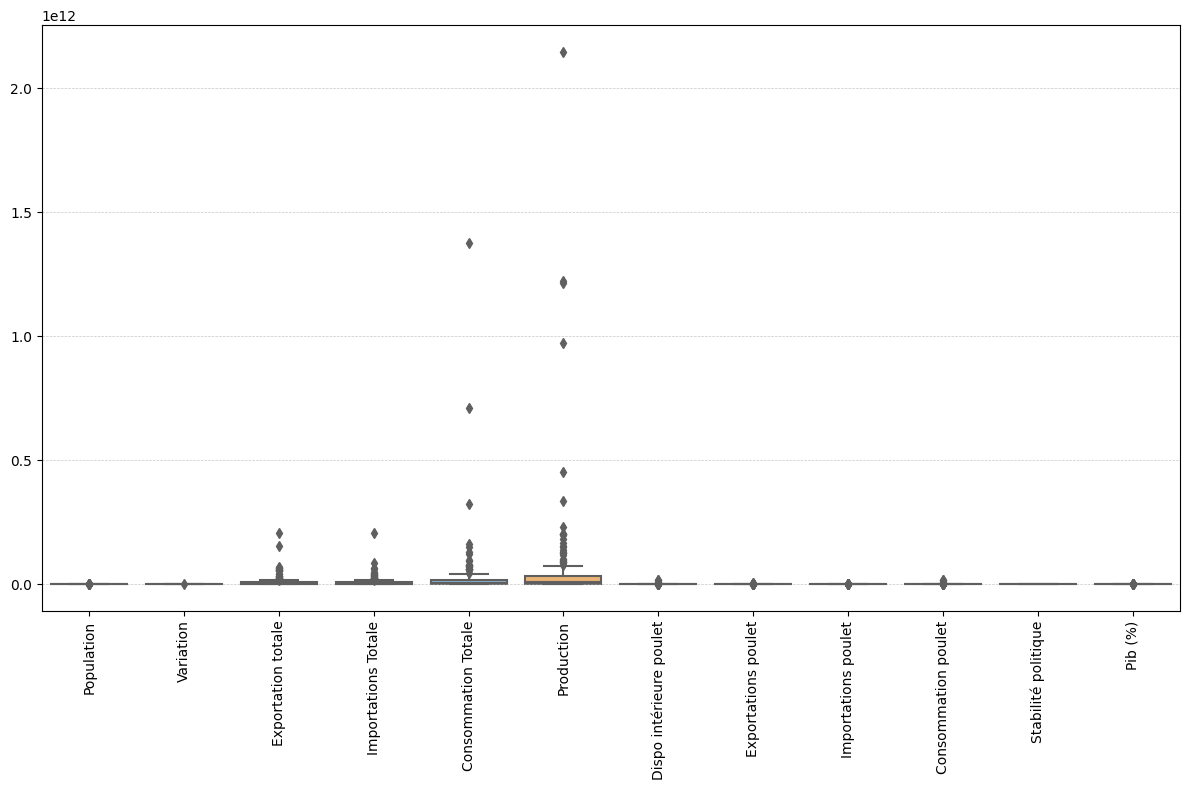

In [335]:
boxplot = reperer_outliers(df_final)

In [336]:
# Afficher les valeurs extremes de Production
df_final.sort_values(by= 'Production', ascending=False).head(10)

,Zone,Population,Variation,Exportation totale,Importations Totale,Consommation Totale,Production,Dispo intérieure poulet,Exportations poulet,Importations poulet,Consommation poulet,Stabilité politique,Pib (%)
33,"Chine, continentale",1421021791,2.590769,4.025100e+10,2.059030e+11,1.376284e+12,2.147703e+12,1.816100e+10,4.180000e+08,452000000.0,1.751800e+10,-0.54,9.0
72,Inde,1338676785,5.445417,3.500600e+10,3.386900e+10,7.108170e+11,1.223513e+12,3.661000e+09,-2.420000e+08,0.0,2.965000e+09,-1.23,14.0
23,Brésil,207833823,4.112191,1.538470e+11,1.766000e+10,1.601330e+11,1.216178e+12,9.982000e+09,4.018000e+09,3000000.0,9.982000e+09,-0.26,14.0
52,États-Unis d'Amérique,325084756,3.396305,2.072780e+11,8.450700e+10,3.220360e+11,9.740340e+11,1.826600e+10,3.632000e+09,123000000.0,1.810000e+10,0.64,4.0
73,Indonésie,264650963,6.120983,3.990100e+10,2.610800e+10,1.500780e+11,4.518710e+11,2.323000e+09,-6.700000e+07,1000000.0,1.904000e+09,-0.52,8.0
54,Fédération de Russie,145530082,1.055582,5.656900e+10,2.397600e+10,1.291020e+11,3.340950e+11,4.556000e+09,9.000000e+06,226000000.0,4.509000e+09,-0.74,23.0
157,Thaïlande,69209810,1.985048,6.758700e+10,1.243600e+10,3.838600e+10,2.317340e+11,8.810000e+08,7.510000e+08,2000000.0,8.960000e+08,-1.31,10.0
8,Argentine,43937140,4.966058,6.362900e+10,3.391000e+09,3.412600e+10,2.044800e+11,1.962000e+09,2.500000e+07,8000000.0,1.856000e+09,0.07,15.0
57,France,64842509,1.971373,5.962800e+10,3.473000e+10,6.118400e+10,2.017630e+11,1.573000e+09,7.740000e+08,506000000.0,1.485000e+09,0.45,5.0
113,Nigéria,190873244,12.387514,7.170000e+08,9.818000e+09,1.202420e+11,2.008780e+11,2.020000e+08,-3.000000e+06,0.0,1.920000e+08,-2.09,-7.0


In [337]:
# Afficher les valeurs extremes de Production
df_final.sort_values(by= 'Consommation Totale', ascending=False).head(10)

,Zone,Population,Variation,Exportation totale,Importations Totale,Consommation Totale,Production,Dispo intérieure poulet,Exportations poulet,Importations poulet,Consommation poulet,Stabilité politique,Pib (%)
33,"Chine, continentale",1421021791,2.590769,4.025100e+10,2.059030e+11,1.376284e+12,2.147703e+12,1.816100e+10,4.180000e+08,452000000.0,1.751800e+10,-0.54,9.0
72,Inde,1338676785,5.445417,3.500600e+10,3.386900e+10,7.108170e+11,1.223513e+12,3.661000e+09,-2.420000e+08,0.0,2.965000e+09,-1.23,14.0
52,États-Unis d'Amérique,325084756,3.396305,2.072780e+11,8.450700e+10,3.220360e+11,9.740340e+11,1.826600e+10,3.632000e+09,123000000.0,1.810000e+10,0.64,4.0
23,Brésil,207833823,4.112191,1.538470e+11,1.766000e+10,1.601330e+11,1.216178e+12,9.982000e+09,4.018000e+09,3000000.0,9.982000e+09,-0.26,14.0
73,Indonésie,264650963,6.120983,3.990100e+10,2.610800e+10,1.500780e+11,4.518710e+11,2.323000e+09,-6.700000e+07,1000000.0,1.904000e+09,-0.52,8.0
54,Fédération de Russie,145530082,1.055582,5.656900e+10,2.397600e+10,1.291020e+11,3.340950e+11,4.556000e+09,9.000000e+06,226000000.0,4.509000e+09,-0.74,23.0
113,Nigéria,190873244,12.387514,7.170000e+08,9.818000e+09,1.202420e+11,2.008780e+11,2.020000e+08,-3.000000e+06,0.0,1.920000e+08,-2.09,-7.0
120,Pakistan,207906209,9.920858,8.155000e+09,8.662000e+09,9.766300e+10,1.974090e+11,1.282000e+09,-2.200000e+07,2000000.0,1.218000e+09,-2.60,9.0
104,Mexique,124777324,6.013247,2.525500e+10,4.468800e+10,9.290900e+10,1.832780e+11,4.219000e+09,-1.270000e+08,972000000.0,4.058000e+09,-0.71,7.0
4,Allemagne,82658409,2.039455,5.879300e+10,6.655000e+10,7.798800e+10,1.678280e+11,1.739000e+09,5.170000e+08,842000000.0,1.609000e+09,0.93,6.0


# Partie III ) Exploration des données   avec "scientisttools"


# Vérification de l'intégrité du dataframe final.


In [338]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, 0 to 171
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Zone                     170 non-null    object 
 1   Population               170 non-null    int64  
 2   Variation                170 non-null    float64
 3   Exportation totale       170 non-null    float64
 4   Importations Totale      170 non-null    float64
 5   Consommation Totale      170 non-null    float64
 6   Production               170 non-null    float64
 7   Dispo intérieure poulet  170 non-null    float64
 8   Exportations poulet      170 non-null    float64
 9   Importations poulet      170 non-null    float64
 10  Consommation poulet      170 non-null    float64
 11  Stabilité politique      170 non-null    float64
 12  Pib (%)                  170 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 18.6+ KB


In [339]:
# Afficher les intitulés uniques de la colonne 'Zone'
df_final.Zone.unique()

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan', 'Bahamas',
       'Bangladesh', 'Barbade', 'Bélarus', 'Belgique', 'Belize', 'Bénin',
       'Bolivie (État plurinational de)', 'Bosnie-Herzégovine',
       'Botswana', 'Brésil', 'Bulgarie', 'Burkina Faso', 'Cabo Verde',
       'Cambodge', 'Cameroun', 'Canada', 'Chili',
       'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao',
       'Chine, continentale', 'Chine, Taiwan Province de', 'Chypre',
       'Colombie', 'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatie',
       'Cuba', 'Danemark', 'Djibouti', 'Dominique', 'Égypte',
       'El Salvador', 'Émirats arabes unis', 'Équateur', 'Espagne',
       'Estonie', 'Eswatini', "États-Unis d'Amérique", 'Éthiopie',
       'Fédération de Russie', 'Fidji', 'Finlande', 'France', 'Gabon',
       'Gambie', 'Géorgie', 'Ghana', 'Grèce', 'Grenade', 'Gu

In [340]:
#afficher df_final
df_final.head(50)

,Zone,Population,Variation,Exportation totale,Importations Totale,Consommation Totale,Production,Dispo intérieure poulet,Exportations poulet,Importations poulet,Consommation poulet,Stabilité politique,Pib (%)
0,Afghanistan,36296113,14.146796,6.010000e+08,4.555000e+09,1.296800e+10,1.160900e+10,5.700000e+07,-5.000000e+06,29000000.0,5.500000e+07,-2.52,3.0
1,Afrique du Sud,57009756,7.326988,1.096800e+10,9.020000e+09,3.172600e+10,6.845500e+10,2.118000e+09,-8.000000e+07,514000000.0,2.035000e+09,-0.05,17.0
2,Albanie,2884169,-1.037630,1.560000e+08,8.840000e+08,3.631000e+09,4.231000e+09,4.700000e+07,-7.700000e+07,38000000.0,4.700000e+07,0.09,9.0
3,Algérie,41389189,9.677150,7.430000e+08,1.971800e+10,3.305600e+10,2.676300e+10,2.770000e+08,-2.200000e+07,2000000.0,2.640000e+08,-1.20,6.0
4,Allemagne,82658409,2.039455,5.879300e+10,6.655000e+10,7.798800e+10,1.678280e+11,1.739000e+09,5.170000e+08,842000000.0,1.609000e+09,0.93,6.0
5,Angola,29816766,15.792575,6.000000e+07,4.153000e+09,1.702500e+10,2.852300e+10,3.190000e+08,-3.500000e+07,277000000.0,3.150000e+08,-0.39,20.0
6,Antigua-et-Barbuda,95426,5.257477,0.000000e+00,7.100000e+07,5.900000e+07,2.300000e+07,7.000000e+06,-2.330000e+08,7000000.0,5.000000e+06,0.96,2.0
7,Arabie saoudite,33101178,11.921868,2.241000e+09,2.641400e+10,1.808600e+10,9.037000e+09,1.435000e+09,-3.560000e+08,722000000.0,1.435000e+09,-0.43,6.0
8,Argentine,43937140,4.966058,6.362900e+10,3.391000e+09,3.412600e+10,2.044800e+11,1.962000e+09,2.500000e+07,8000000.0,1.856000e+09,0.07,15.0
9,Arménie,2944791,2.056411,2.440000e+08,8.460000e+08,2.962000e+09,3.708000e+09,4.700000e+07,-5.700000e+07,35000000.0,4.700000e+07,0.11,9.0


In [341]:
df_final['TDI'] = df_final['Importations Totale'] / df_final['Exportation totale']
df_final['TDI'] = df_final['TDI'].where(df_final['Exportation totale'] != 0, 0)  # Remplace les divisions par zéro par 0

df_final['TAS'] = df_final['Consommation Totale'] / df_final['Exportation totale']
df_final['TAS'] = df_final['TAS'].where(df_final['Exportation totale'] != 0, 0)  # Remplace les divisions par zéro par 0


In [342]:
# df test reperer nan, outliers, doublons
verifier_integrite(df_final)


Le dataframe ne contient pas de valeurs manquantes.
Le dataframe ne contient pas de doublons.
Les clés de jointure sont uniques.
Le dataframe contient 170 lignes et 15 colonnes.


In [343]:
df_final.describe()

,Population,Variation,Exportation totale,Importations Totale,Consommation Totale,Production,Dispo intérieure poulet,Exportations poulet,Importations poulet,Consommation poulet,Stabilité politique,Pib (%),TDI,TAS
count,1.700000e+02,170.000000,1.700000e+02,1.700000e+02,1.700000e+02,1.700000e+02,1.700000e+02,1.700000e+02,1.700000e+02,1.700000e+02,170.000000,170.000000,170.000000,170.000000
mean,4.311688e+07,6.207292,9.350947e+09,8.700724e+09,3.082796e+10,6.627671e+10,6.875941e+08,5.770588e+07,8.952941e+07,6.570471e+08,-0.077353,7.271765,8.664835,32.223677
std,1.539395e+08,5.601534,2.404289e+10,2.000544e+10,1.220647e+11,2.260380e+11,2.187185e+09,4.797984e+08,1.866700e+08,2.136546e+09,0.904614,6.564088,19.524891,104.103049
min,5.204500e+04,-7.562140,0.000000e+00,2.600000e+07,2.300000e+07,2.100000e+07,2.000000e+06,-3.560000e+08,0.000000e+00,2.000000e+06,-2.600000,-27.000000,0.000000,0.000000
25%,2.855103e+06,2.170203,1.780000e+08,8.242500e+08,1.856250e+09,2.321000e+09,3.050000e+07,-7.275000e+07,3.000000e+06,2.850000e+07,-0.652500,5.000000,0.812197,1.414317
50%,9.757833e+06,5.491577,8.740000e+08,2.671500e+09,6.407500e+09,1.077000e+10,1.000000e+08,-2.300000e+07,1.600000e+07,9.950000e+07,0.000000,7.000000,2.411201,4.926823
75%,2.971320e+07,10.349028,7.207500e+09,7.778250e+09,1.782075e+10,3.263625e+10,3.682500e+08,-2.000000e+06,8.125000e+07,3.652500e+08,0.670000,10.000000,6.190662,23.206731
max,1.421022e+09,25.030369,2.072780e+11,2.059030e+11,1.376284e+12,2.147703e+12,1.826600e+10,4.018000e+09,1.069000e+09,1.810000e+10,1.450000,36.000000,175.200000,1103.000000


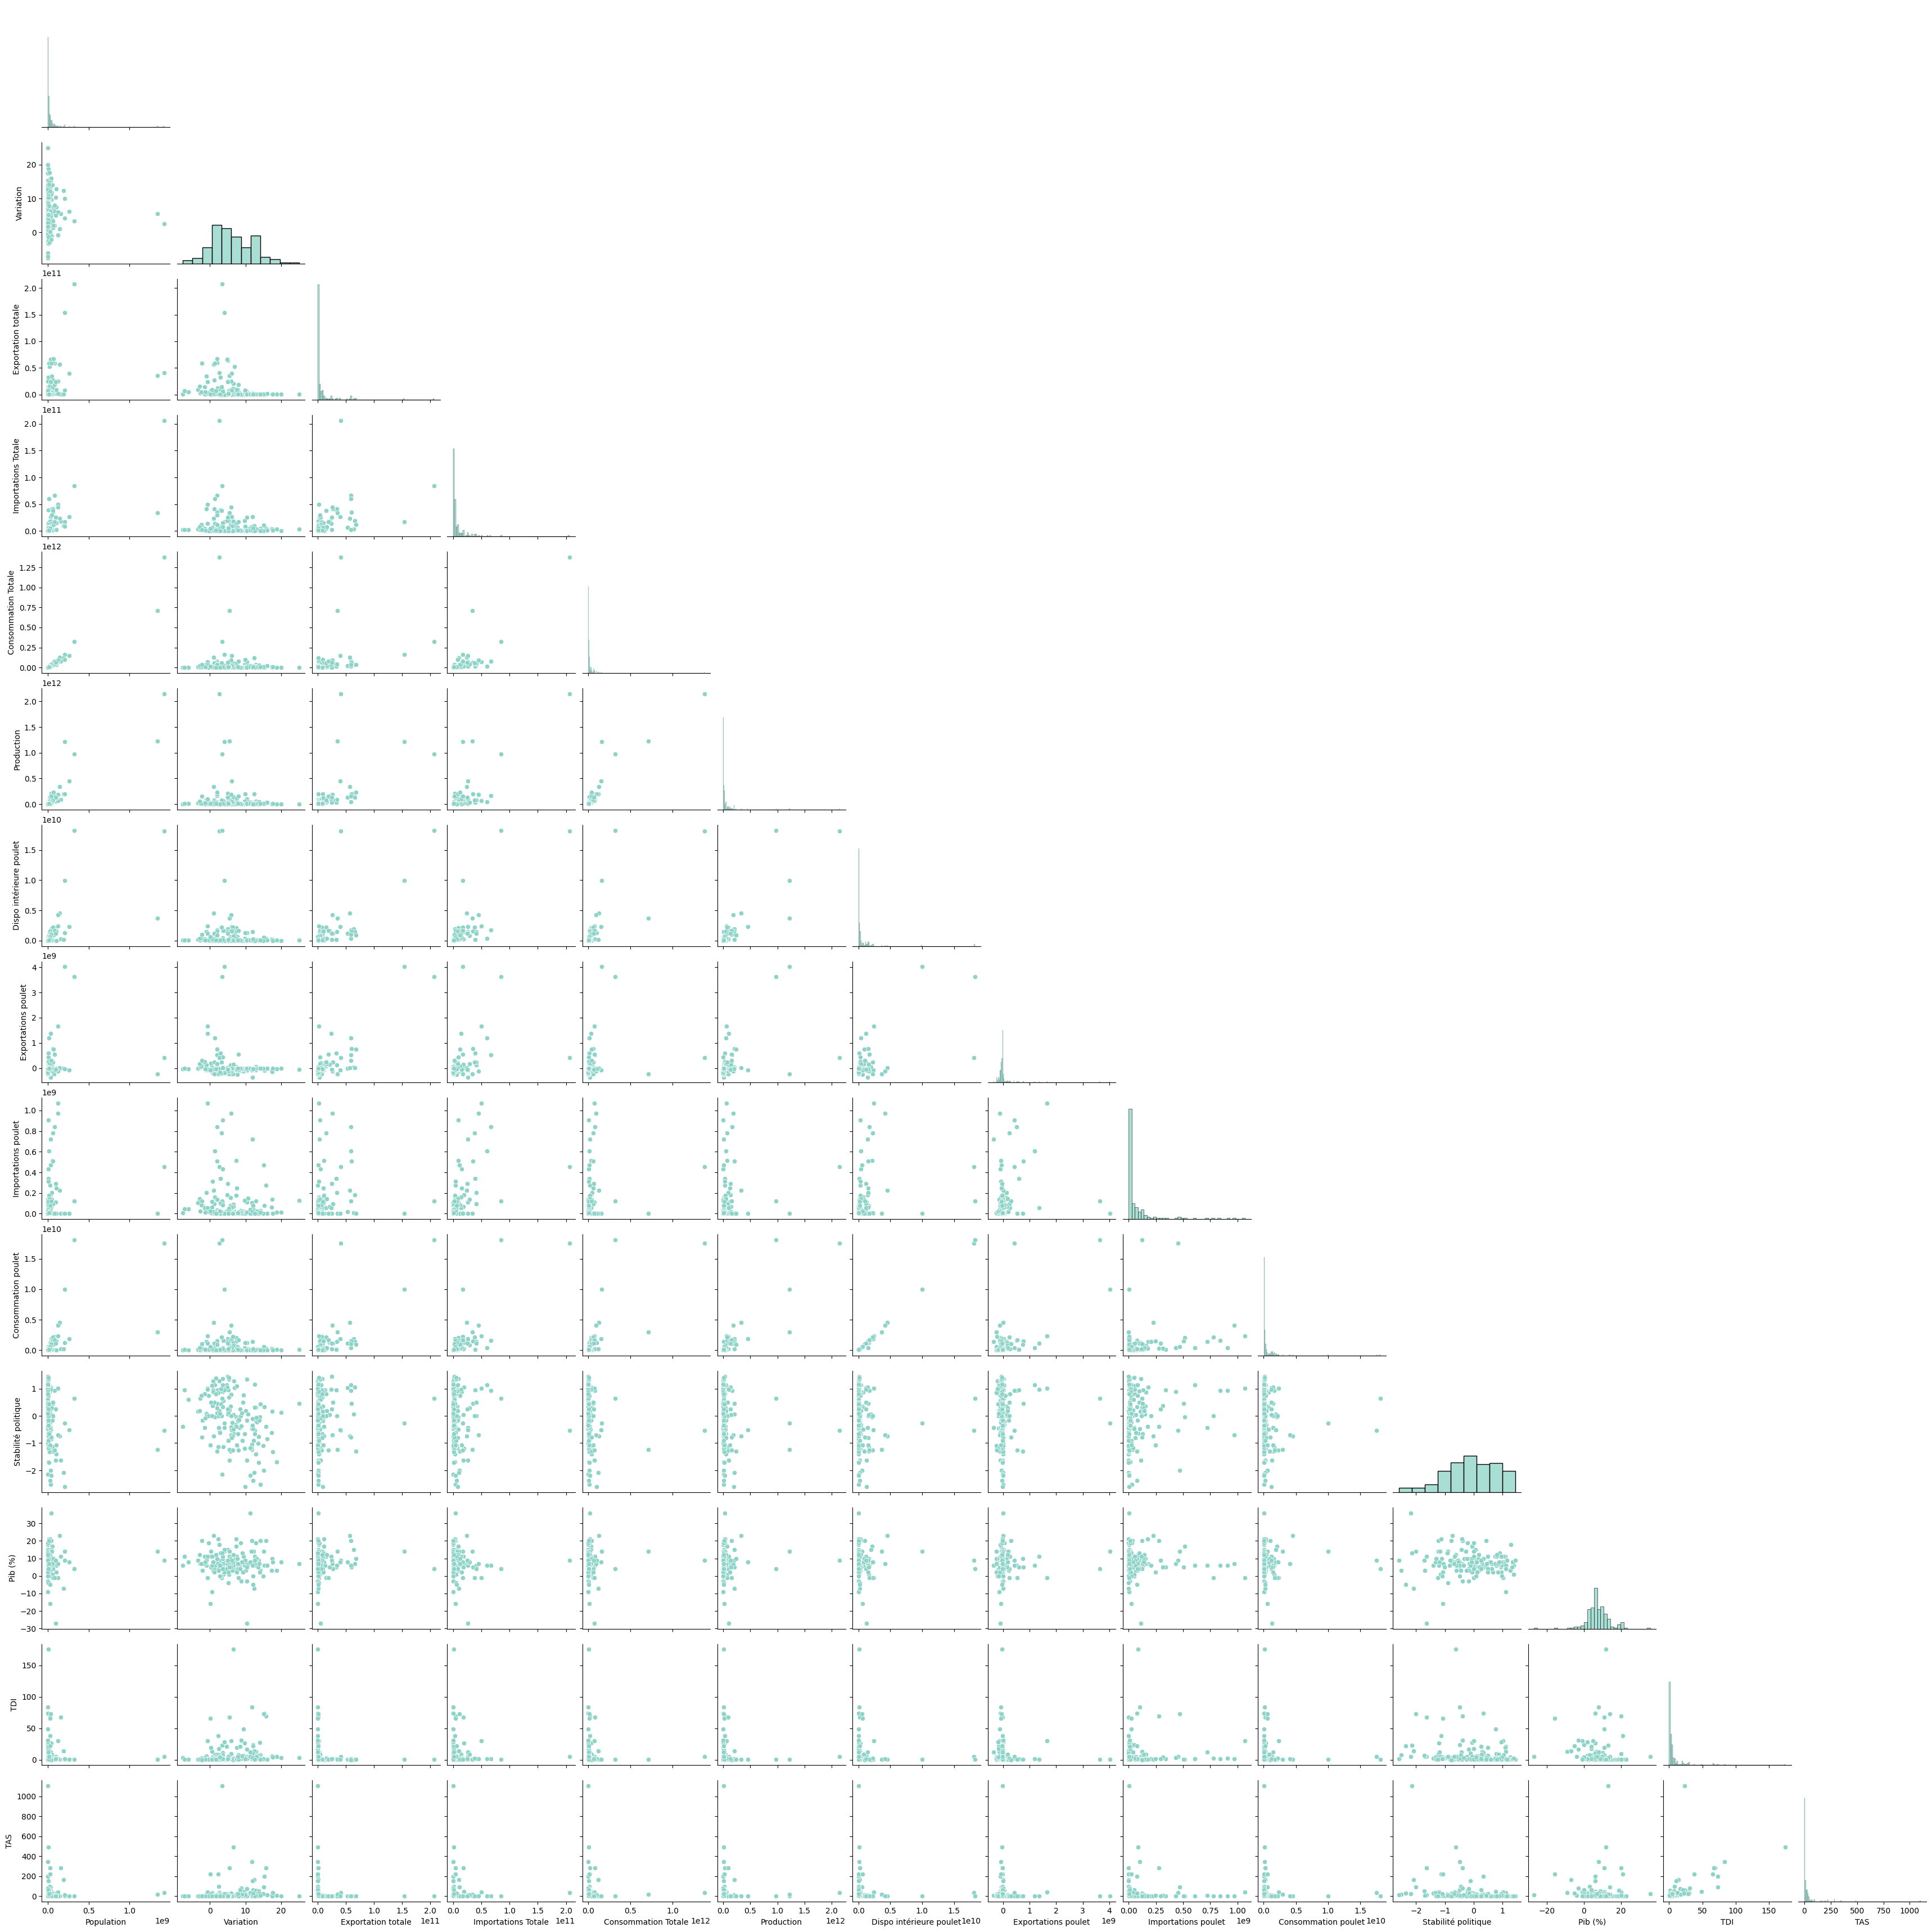

In [344]:
# Affichage des corrélations entre les variables
sns.pairplot(df_final, corner=True)

In [345]:
#Enregistrer le dataframe final avant TEST   
df_final.to_csv('df_final.csv', index=False)

In [346]:
# drop colonne redondante ( Exportation totale	Importations Totale	Consommation Totale)
df_final = df_final.drop(columns=['Exportation totale', 'Importations Totale', 'Consommation Totale'])

### ACP et éboulis des valeurs propres

In [347]:
# indexation de la colonne 'Zone'
df_final = df_final.set_index('Zone')

In [348]:
# Check Nan
df_final.isna().sum()

Population                 0
Variation                  0
Production                 0
Dispo intérieure poulet    0
Exportations poulet        0
Importations poulet        0
Consommation poulet        0
Stabilité politique        0
Pib (%)                    0
TDI                        0
TAS                        0
dtype: int64

In [349]:
#df ISnull
df_final.isnull().sum()

Population                 0
Variation                  0
Production                 0
Dispo intérieure poulet    0
Exportations poulet        0
Importations poulet        0
Consommation poulet        0
Stabilité politique        0
Pib (%)                    0
TDI                        0
TAS                        0
dtype: int64

In [350]:
#df types    
df_final.dtypes

Population                   int64
Variation                  float64
Production                 float64
Dispo intérieure poulet    float64
Exportations poulet        float64
Importations poulet        float64
Consommation poulet        float64
Stabilité politique        float64
Pib (%)                    float64
TDI                        float64
TAS                        float64
dtype: object

In [351]:
#matrice de corrélation sous forme de t
df_final.corr().style.background_gradient(cmap='coolwarm')


,Population,Variation,Production,Dispo intérieure poulet,Exportations poulet,Importations poulet,Consommation poulet,Stabilité politique,Pib (%),TDI,TAS
Population,1.000000,-0.035885,0.894052,0.675811,0.183081,0.150922,0.656812,-0.187929,0.054936,-0.034517,-0.000428
Variation,-0.035885,1.000000,-0.088816,-0.110757,-0.148320,-0.115677,-0.110647,-0.401342,-0.000316,0.157386,0.084715
Production,0.894052,-0.088816,1.000000,0.881693,0.501062,0.147709,0.871678,-0.114370,0.082224,-0.080224,-0.035442
Dispo intérieure poulet,0.675811,-0.110757,0.881693,1.000000,0.649096,0.262413,0.998720,-0.047480,0.029305,-0.074808,-0.054307
Exportations poulet,0.183081,-0.148320,0.501062,0.649096,1.000000,0.225946,0.660952,0.081830,0.029121,-0.065515,-0.045625
Importations poulet,0.150922,-0.115677,0.147709,0.262413,0.225946,1.000000,0.261816,0.122534,-0.035464,0.044459,-0.042511
Consommation poulet,0.656812,-0.110647,0.871678,0.998720,0.660952,0.261816,1.000000,-0.041694,0.027351,-0.072461,-0.053020
Stabilité politique,-0.187929,-0.401342,-0.114370,-0.047480,0.081830,0.122534,-0.041694,1.000000,-0.042099,-0.172471,-0.292775
Pib (%),0.054936,-0.000316,0.082224,0.029305,0.029121,-0.035464,0.027351,-0.042099,1.000000,-0.016344,0.058872
TDI,-0.034517,0.157386,-0.080224,-0.074808,-0.065515,0.044459,-0.072461,-0.172471,-0.016344,1.000000,0.591197


In [352]:
#ACP avec scientistools
from scientisttools.decomposition import PCA
from scientisttools.extractfactor import get_eig


acp = PCA(normalize=True,graph=False)
acp.fit(df_final)

#valeurs propres
get_eig(acp)




,eigenvalue,difference,proportion,cumulative
Dim.1,3.970471,2.071534,36.095193,36.095193
Dim.2,1.898937,0.633975,17.263067,53.358260
Dim.3,1.264963,0.249056,11.499660,64.857920
Dim.4,1.015907,0.147201,9.235519,74.093439
Dim.5,0.868706,0.066494,7.897331,81.990770
Dim.6,0.802213,0.227713,7.292842,89.283612
Dim.7,0.574500,0.217137,5.222727,94.506339
Dim.8,0.357363,0.138338,3.248756,97.755094
Dim.9,0.219025,0.192045,1.991139,99.746234
Dim.10,0.026980,0.026047,0.245277,99.991510


Les valeurs propres dans une ACP représentent la variance expliquée par chaque dimension ou composante principale. Elles permettent de déterminer l'importance relative de chaque dimension dans la représentation des données. Les valeurs propres sont les suivantes :

La première dimension (Dim.1) a une valeur propre de 3.970471, ce qui signifie qu'elle capture 36.10% de la variance totale.
La deuxième dimension (Dim.2) a une valeur propre de 1.898937, correspondant à 17.26% de la variance totale.
La troisième dimension (Dim.3) a une valeur propre de 1.264963, expliquant 11.50% de la variance.
La quatrième dimension (Dim.4) a une valeur propre de 1.015907, représentant 9.24% de la variance.
La cinquième dimension (Dim.5) a une valeur propre de 0.868706, expliquant 7.90% de la variance.
La contribution de chaque dimension diminue progressivement, et à partir de la sixième dimension (Dim.6), les valeurs propres sont inférieures à 1, ce qui signifie qu'elles expliquent moins de variance que chaque dimension précédente. Les dimensions subséquentes (Dim.7 à Dim.11) ont des valeurs propres encore plus faibles et sont négligeables en termes d'explication de la variance. En effet, la onzième dimension (Dim.11) a une valeur propre très proche de zéro, indiquant qu'elle n'explique pratiquement aucune variance et peut être ignorée dans l'analyse.

En résumé, les premières dimensions de notre ACP capturent la majeure partie de la variance des données, tandis que les dimensions subséquentes ont des contributions de plus en plus faibles. Cette information est essentielle pour comprendre quelles dimensions sont les plus significatives dans notre analyse et pour interpréter les résultats de l'ACP.

In [353]:
#soit
acp.eig_[0]

array([3.97047122e+00, 1.89893734e+00, 1.26496264e+00, 1.01590706e+00,
       8.68706450e-01, 8.02212586e-01, 5.74499932e-01, 3.57363148e-01,
       2.19025309e-01, 2.69804553e-02, 9.33851951e-04])

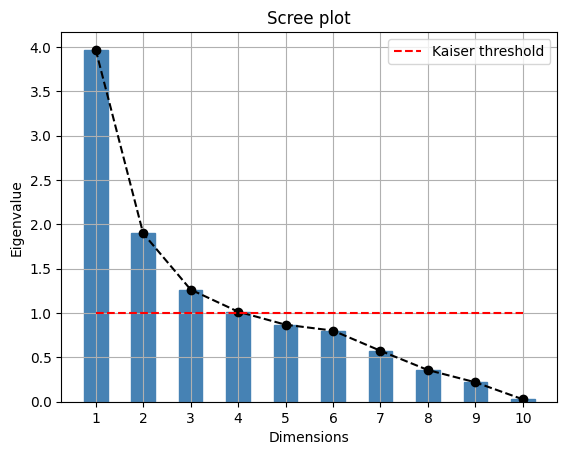

In [354]:
#screeplot avec la règle de Kaiser-Gutman
from scientisttools.pyplot import plot_eigenvalues
plot_eigenvalues(acp,choice='eigenvalue',add_kaiser=True)


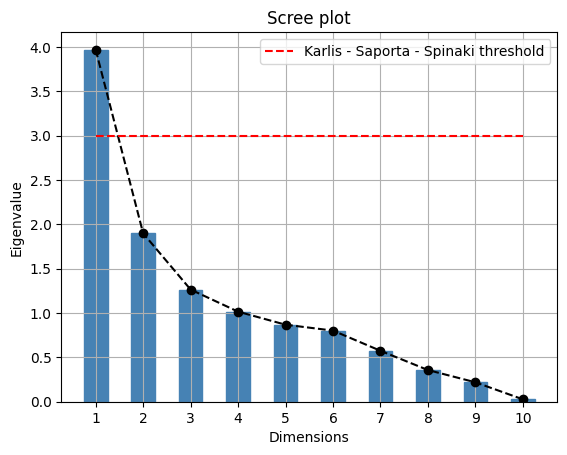

In [355]:
#seuil de Karlis - Saporta - Spinaki
plot_eigenvalues(acp,choice="eigenvalue",add_kss=True)

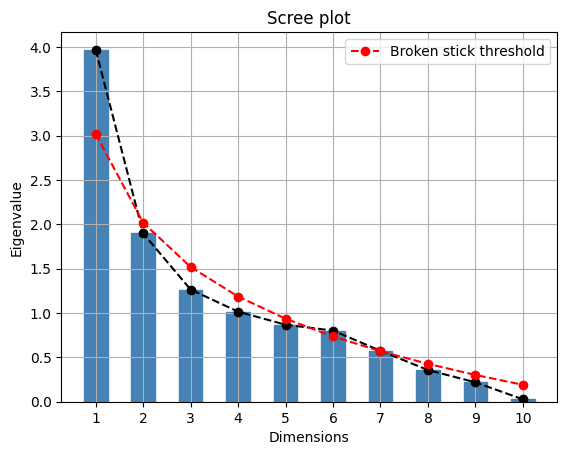

In [356]:
#screeplot avec les seuils des bâtons brisés
plot_eigenvalues(acp,choice='eigenvalue',add_broken_stick=True)

Le graphique de Kaiser et le concept de "broken stick" ont été utilisés pour déterminer combien de composantes principales devraient être retenues dans votre analyse en composantes principales (PCA), en se basant sur les résultats des valeurs propres obtenues.

En regardant le graphique de Kaiser, nous pouvons observer que les valeurs propres ont été tracées sur l'axe des ordonnées, tandis que les numéros de composantes principales ont été tracés sur l'axe des abscisses. La barre de seuil a été fixée à une valeur de 1. Selon cette méthode, seules les composantes avec des valeurs propres supérieures à 1 sont considérées comme significatives et devraient être retenues. En examinant vos résultats, nous constatons que les quatre premières composantes principales ont des valeurs propres supérieures à 1, ce qui signifie qu'elles expliquent plus de variance que celle attendue au hasard et sont donc considérées comme significatives.

Quant au concept de "broken stick", il utilise une approche statistique pour déterminer quelles composantes devraient être retenues. Selon ce concept, les valeurs propres sont comparées à une "barre de référence" qui représente la proportion de variance attendue au hasard pour chaque composante. Si une valeur propre dépasse la barre de référence, elle est considérée comme significative et la composante correspondante est retenue. Dans votre cas, les quatre premières valeurs propres dépassent la barre de référence, ce qui confirme leur signification statistique.

En résumé, en se basant sur les résultats des valeurs propres, tant le graphique de Kaiser que le concept de "broken stick" indiquent que les quatre premières composantes principales de notre analyse en composantes principales sont statistiquement significatives et devraient être retenues. Ces composantes captent une quantité importante de variance dans vos données et sont donc essentielles pour l'ACP.

In [357]:
#  enregistrer dataframe
df_final.to_csv('df_finalTEST.csv', index=False)
